In [1]:
#imports
import requests
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np

# Web scrapping from Reddit for Search query
### url used: 
"https://www.reddit.com/r/Coronavirus/comments/k4k6cu/dont_want_the_covid19_vaccine_you_could_lose/"

In [2]:
url = "https://www.reddit.com/r/Coronavirus/comments/k4k6cu/dont_want_the_covid19_vaccine_you_could_lose/"
resp = requests.get(url)
if resp.status_code==502:
    print("pull unsuccessful please try again")
else: print("pull successful")
print(resp.status_code)
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()

pull successful
200


### extracting reviews from specific html tags

In [3]:
reviews = soup.findAll("p", attrs={"class","_1qeIAgB0cPwnLhDF9XSiJM"})
print(type(reviews))
for i in range(len(reviews)):
    reviews[i] = reviews[i].text
    
    

<class 'bs4.element.ResultSet'>


### search results extracted 

In [4]:
reviews

["This is the exact headline that will spread across facebook. My grandma has already told me she's ready to go to prison (which she thinks is going to happen) before taking this vaccine.",
 "Rofl, she's the person that needs it the most.",
 "Not to be rude but if this is the logic i'm afraid your grandma seems ready to go period before taking the vaccine.",
 'If she’s hated social distancing and COVID restrictions that (according to this hyperbolic rhetoric) keep you “imprisoned” in your house, then why the hell does she want to sacrifice muh freedoms for literal prison?',
 'Tell her to organize the Million Granny March on Bill Gates mansion. Sit back and watch the fun.',
 "The headline is actually pretty extreme though. Personally speaking, I'm not that fond of the vaccine's that seem the earliest available right now that make use of the mRNA mechanism (with moderna and pfizer being in the news frequently). I believe in our scientists the people that created it, but on a personal sca

## Preprocessing data

In [5]:
# Creating a data frame 
import pandas as pd
reddit_reviews = pd.DataFrame(columns = ["reviews"])
reddit_reviews["reviews"] = reviews
reddit_reviews

,reviews
0,This is the exact headline that will spread ac...
1,"Rofl, she's the person that needs it the most."
2,Not to be rude but if this is the logic i'm af...
3,If she’s hated social distancing and COVID res...
4,Tell her to organize the Million Granny March ...
5,The headline is actually pretty extreme though...
6,"Say fine, and have you updated your will?"
7,Then rub your hands together.
8,For real. My husband’s grandmother has been p...
9,Not wanting a rushed vaccine of new type right...


In [6]:
# writng reviews in a text file 
with open("reddit_reviews.csv","w",encoding='utf8') as output:
    output.write(str(reviews))

In [7]:
# Reading reviews from a text file 
with open("reddit_reviews.csv","r",encoding='utf8') as input:
    reddit_reviews = input.read().split()
type(reddit_reviews)   

list

In [8]:
# Joinining all the reviews into single paragraph 
red_rev_string = " ".join(reddit_reviews)

# Removing unwanted symbols incase if exists
red_rev_string = re.sub("[^A-Za-z" "]+"," ",red_rev_string).lower()
red_rev_string = re.sub("[0-9" "]+"," ",red_rev_string)


# words that contained in  reviews
red_reviews_words = red_rev_string.split(" ")

stop_words = STOPWORDS
#stopwords = stop_words.split("\n")

red_reviews_words = [w for w in red_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
red_rev_string = " ".join(red_reviews_words)

In [9]:
## Final string for word cloud analysis
red_rev_string

' exact headline will spread across facebook grandma already told s ready go prison thinks going happen taking vaccine rofl s person needs rude logic m afraid grandma seems ready go period taking vaccine s hated social distancing covid restrictions according hyperbolic rhetoric keep imprisoned house hell want sacrifice muh freedoms literal prison tell organize million granny march bill gates mansion sit back watch fun headline actually pretty extreme though personally speaking m fond vaccine s seem earliest available right now make use mrna mechanism moderna pfizer news frequently believe scientists people created personal scale d actually rather take wait inactivated vaccine say fine updated will rub hands together real husband s grandmother playing fire entire pandemic got diagnosed leaky heart valve needs surgery now two us mentally preparing bad news point wanting rushed vaccine new type right away untested long term side effects usually vaccines take years go safety trials mention

##  wordcloud for the extracted query

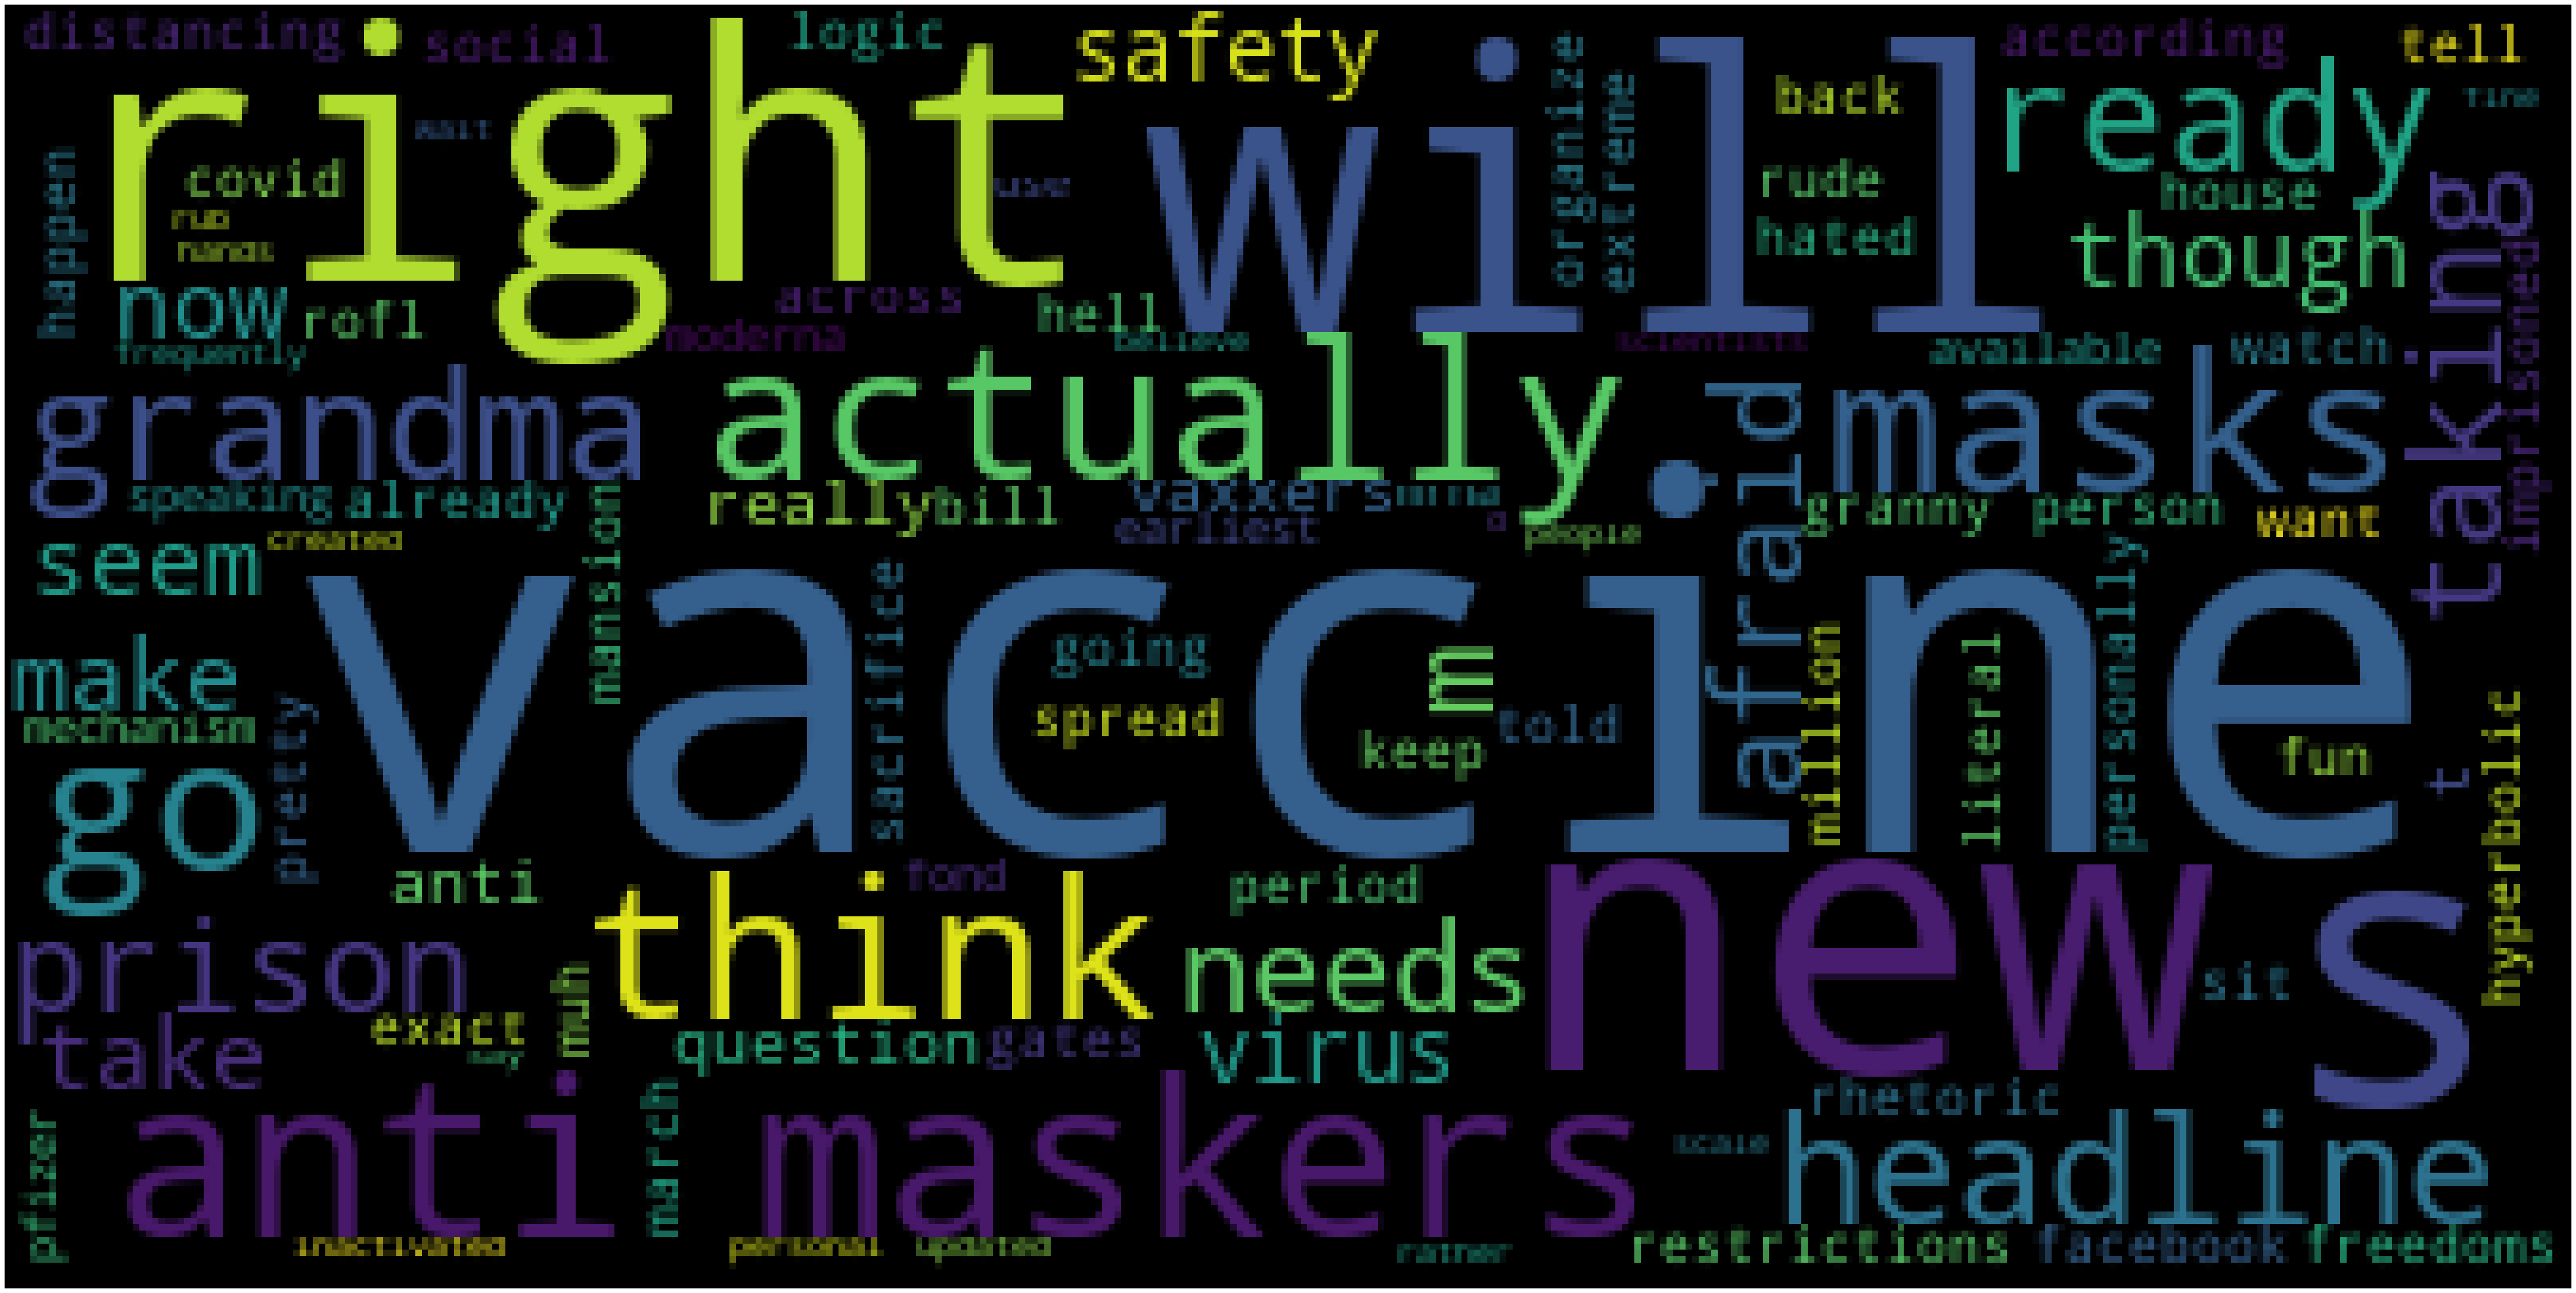

In [10]:

wordcloud_rev = WordCloud(
                      background_color='black',
                      max_words = 100
                     ).generate(red_rev_string)
plt.figure( figsize=(70,50) )
plt.imshow(wordcloud_rev)
plt.axis("off")
plt.show()

####  writng reviews in a csv file for further analysis

In [11]:

with open("SearchQuery.csv","w",encoding='utf8') as output:
    output.write(str(red_rev_string.split(" ")))

# Web scrapping Reddit for News query
### url used:
https://www.reddit.com/r/canada/comments/k4ni8o/canada_will_be_among_first_countries_set_to

In [14]:
##url = "Reddit url "
url_news = "https://www.reddit.com/r/canada/comments/k4ni8o/canada_will_be_among_first_countries_set_to"
resp = requests.get(url_news)
if (resp.status_code)==502:
    print("Pull Unsuccessful please try again")
else :print("Pull sucessfull ")
#print(resp.content)
soup = BeautifulSoup(resp.text,"html.parser")
#soup.prettify()
#response code 200 is sucessful 502 is unsucessfull

Pull sucessfull 


In [15]:
news=soup.findAll("p", attrs={"class","_1qeIAgB0cPwnLhDF9XSiJM"})
print(type(news))
for i in range(len(news)):
    news[i] = news[i].text
    

<class 'bs4.element.ResultSet'>


In [16]:
news

['This article, in combination with all the articles claiming Canada will be among the last to get vaccines, leaves me rather uncertain about what’s actually going to happen. As with the release of Cyberpunk 2077, I’ll try not to get my hopes up until I can feel it coursing through my veins.',
 'Just as an FYI, it is not recommended to consume Cyberpunk via injection.',
 'The only people who keep claiming we are last in line is the conservative party of Canada.',
 "As I understand it most of the concerns about us being last come from the Saskatchewan premiere's comments that took what the Prime Minister said about tempering expectations because the countries producing these vaccines may prioritize their own citizens wildly put of context.",
 'Let\'s not forget we live in a world where "Donald Trump not allowing the ground breaking corona virus cure he single handedly developed to be exported because the leader of the snow mexicans won\'t acknowledge his victory against the socialist Jo

## preprocessing data

In [17]:
# Joinining all the reviews into single paragraph 
news_rev_string = " ".join(news)

# Removing unwanted symbols incase if exists
news_rev_string = re.sub("[^A-Za-z" "]+"," ",news_rev_string).lower()
news_rev_string = re.sub("[0-9" "]+"," ",news_rev_string)


# words that contained in  reviews
news_reviews_words = news_rev_string.split(" ")

stop_words = STOPWORDS
#stopwords = stop_words.split("\n")

news_reviews_words = [w for w in news_reviews_words if not w in stop_words]

# Joinining all the reviews into single paragraph 
news_rev_string = " ".join(news_reviews_words)

In [18]:
#news string
news_rev_string

'article combination articles claiming canada will among last vaccines leaves rather uncertain s actually going happen release cyberpunk ll try hopes feel coursing veins fyi recommended consume cyberpunk via injection people keep claiming last line conservative party canada understand concerns us last come saskatchewan premiere s comments took prime minister said tempering expectations countries producing vaccines may prioritize citizens wildly put context let s forget live world donald trump allowing ground breaking corona virus cure single handedly developed exported leader snow mexicans won t acknowledge victory socialist joe biden isn t exactly farfetched headline already withholding stimulus package people everything prevent us company exporting vaccine foreigners reality need prepare please understand scott moe really knows things kill people drinking driving pander rural farmer base votes blame justin trudeau don t worry will see vaccination will see cyberpunk still nine days de

In [19]:
#data frame for News
import pandas as pd
News = pd.DataFrame(columns = ["News"])
News["News"] = news
News

,News
0,"This article, in combination with all the arti..."
1,"Just as an FYI, it is not recommended to consu..."
2,The only people who keep claiming we are last ...
3,As I understand it most of the concerns about ...
4,"Let's not forget we live in a world where ""Don..."
5,But please understand Scott Moe really only kn...
6,1.) Kill people while drinking and driving.
7,2.) Pander to the rural farmer base for votes.
8,3.) Blame Justin Trudeau.
9,Don’t worry we will see the Vaccination before...


In [20]:
# Using entire dataset for LDA
data=News
data

,News
0,"This article, in combination with all the arti..."
1,"Just as an FYI, it is not recommended to consu..."
2,The only people who keep claiming we are last ...
3,As I understand it most of the concerns about ...
4,"Let's not forget we live in a world where ""Don..."
5,But please understand Scott Moe really only kn...
6,1.) Kill people while drinking and driving.
7,2.) Pander to the rural farmer base for votes.
8,3.) Blame Justin Trudeau.
9,Don’t worry we will see the Vaccination before...


In [21]:
type(data)

pandas.core.frame.DataFrame

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
cv = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

In [24]:
cv.input

'content'

In [25]:
dtm = cv.fit_transform(data['News'])

# Latent Dirichlet Allocation

In [26]:
from sklearn.decomposition import LatentDirichletAllocation

In [27]:
LDA = LatentDirichletAllocation(n_components=5,learning_method='online', random_state=42)

In [28]:
LDA.fit(dtm)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [29]:
topic_results = LDA.transform(dtm)

In [30]:
print(topic_results.shape)
topic_results[18].round(2)

(33, 5)


array([0.05, 0.05, 0.8 , 0.05, 0.05])

### Print most important words in each topic

In [31]:
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 3 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[-3:]])
    print('\n')

THE TOP 5 WORDS FOR TOPIC #0
['april', 'moderna', 'pfizer', 'doses', 'canada']


THE TOP 5 WORDS FOR TOPIC #1
['understand', 'doesn', 'really', 'probably', 'come']


THE TOP 5 WORDS FOR TOPIC #2
['pfizer', 'prioritize', 'countries', 'people', 'vaccine']


THE TOP 5 WORDS FOR TOPIC #3
['cyberpunk', '2021', 'volume', 'just', 'time']


THE TOP 5 WORDS FOR TOPIC #4
['happen', 'canada', 'end', 'going', 'line']




In [32]:
data['Topic'] = topic_results.argmax(axis=1)

## News query w.r.t Topics set given above

In [33]:

data.head(10)

,News,Topic
0,"This article, in combination with all the arti...",4
1,"Just as an FYI, it is not recommended to consu...",3
2,The only people who keep claiming we are last ...,4
3,As I understand it most of the concerns about ...,0
4,"Let's not forget we live in a world where ""Don...",2
5,But please understand Scott Moe really only kn...,1
6,1.) Kill people while drinking and driving.,2
7,2.) Pander to the rural farmer base for votes.,0
8,3.) Blame Justin Trudeau.,0
9,Don’t worry we will see the Vaccination before...,2


####  writng reviews in a csv file for further analysis

In [34]:
lda_list=[]
for index,topic in enumerate(LDA.components_):
    lda_list.append(([cv.get_feature_names()[i] for i in topic.argsort()[:]]))
    


In [35]:
str_lda=str(lda_list)

In [36]:
with open("NewsQuery.csv","w",encoding='utf8') as output:
    output.write(str(str_lda.split(" ' '")))